In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
# Some general settings
figtemplate = 'seaborn'

# Download Dataset
[Global Coffee Health Dataset](https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset) 是一份包含 20 個國家/地區的咖啡消費、睡眠行為和健康結果真實模式的資料集，共有 10000 筆資料。  


In [3]:
import glob
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/global-coffee-health-dataset")
print(glob.glob(f"{path}/*.csv"))

100%|██████████| 184k/184k [00:00<00:00, 11.1MB/s]

Extracting files...
['/root/.cache/kagglehub/datasets/uom190346a/global-coffee-health-dataset/versions/1/synthetic_coffee_health_10000.csv']


In [4]:
# Load data
df = pd.read_csv(f'/root/.cache/kagglehub/datasets/uom190346a/global-coffee-health-dataset/versions/1/synthetic_coffee_health_10000.csv')

# first 5 rows
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


# Exploratory Data Analysis (EDA)

## Check data types and nulls
此資料集有 10000 筆。撇除欄位 `ID`，特徵數共有 15 個。  
透過原資料敘述，更正 `Smoking` 與 `Alcohol_Consumption` 的資料型態為 Boolean。  
變數 `Health_Issues` 看似有缺失值存在，實際上空值表示該測試者無任何健康問題，應補上。


In [5]:
# Revise the dtype
df["Smoking"] = df["Smoking"].astype('bool')
df["Alcohol_Consumption"] = df["Alcohol_Consumption"].astype('bool')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [6]:
# Remove ID
df = df.drop(columns=["ID"])

# Replace NaN with None
df["Health_Issues"] = df["Health_Issues"].apply(lambda x: "None" if pd.isnull(x) else x)

## Quantitative Variables
先來看定量變數分析，咖啡杯數與咖啡因攝取量高度相關，也具有類似的分布。


In [7]:
quantitative = list(df.select_dtypes(include=['float64', 'int64']).columns)

df[quantitative].describe().round(3)

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,34.949,2.509,238.411,6.636,23.987,70.618,7.487
std,11.161,1.450,137.749,1.222,3.906,9.823,4.315
min,18.000,0.000,0.000,3.000,15.000,50.000,0.000
25%,26.000,1.500,138.750,5.800,21.300,64.000,3.700
50%,34.000,2.500,235.400,6.600,24.000,71.000,7.500
75%,43.000,3.500,332.025,7.500,26.600,77.000,11.200
max,80.000,8.200,780.300,10.000,38.200,109.000,15.000


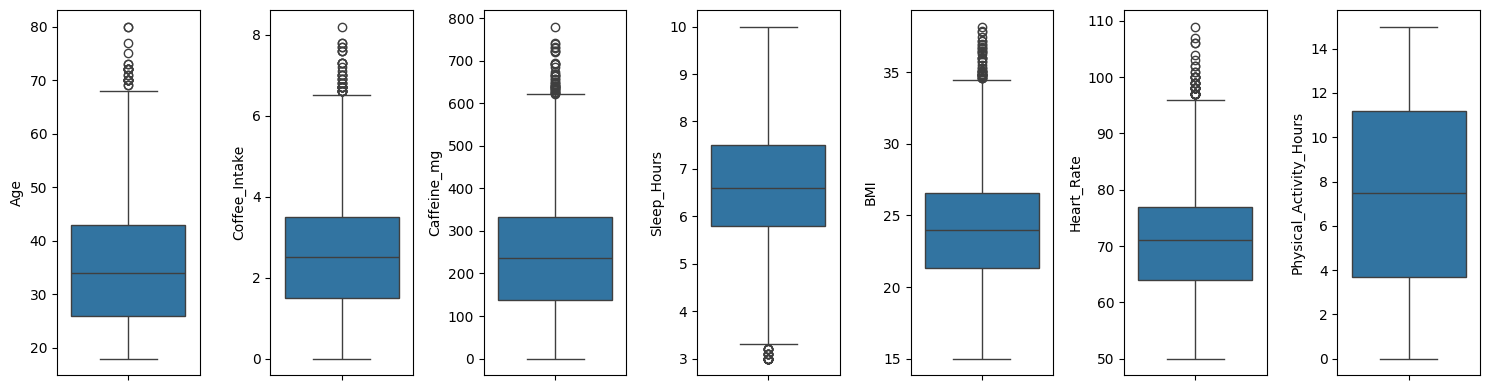

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=len(quantitative), figsize = (15, 4))

for i, col in enumerate(quantitative):
    sns.boxplot(df[col], ax=axes[i])

fig.tight_layout()

## Categorical Variables
類別變數包含以下 6 個: `Gender`, `Country`, `Sleep_Quality`, `Stress_Level`, `Health_Issues`, `Occupation`, `Smoking`, `Alcohol_Consumption`  
在此資料中，大部分人的睡眠品質好、壓力小，整體健康是好的，而不抽菸不喝酒的人也佔多數。

In [9]:
categorical = list(df.select_dtypes(include=['object', 'bool']).columns)

for col in categorical:
  c_df = df[col].value_counts().reset_index()
  fig = px.pie(c_df, values="count", names=col, title=col, width=500, height=300, template=figtemplate)
  fig.show()

將 20 個國家以州區域分成 4 個群:
- 歐洲 Europe: Germany, Spain, France, UK, Switzerland, Netherlands, Italy, Belgium, Finland, Sweden, Norway
- 美洲 Americas: Brazil, Mexico, Canada, USA
- 亞洲 Asia: China, India, Japan, South Korea
- 大洋洲 Oceania: Australia

合併之後，歐洲占比超過一半。


In [10]:
country_to_region = {
    "Germany": "Europe",
    "Spain": "Europe",
    "France": "Europe",
    "UK": "Europe",
    "Switzerland": "Europe",
    "Netherlands": "Europe",
    "Italy": "Europe",
    "Belgium": "Europe",
    "Finland": "Europe",
    "Sweden": "Europe",
    "Norway": "Europe",

    "Brazil": "Americas",
    "Mexico": "Americas",
    "Canada": "Americas",
    "USA": "Americas",

    "China": "Asia",
    "Japan": "Asia",
    "India": "Asia",
    "SouthKorea": "Asia",

    "Australia": "Oceania"
}

df["Region"] = df["Country"].map(country_to_region)
c_df = df["Region"].value_counts().reset_index()
px.pie(c_df, values="count", names="Region", title="Region", width=500, height=300, template=figtemplate)

## Correlations
觀察變數之間的相關係數，每日咖啡杯數 `Coffee_Intake` 與每日咖啡因攝取量 `Caffeine_mg` 完全相關，而 `Coffee_Intake` 是從杯數估計出來的，因此選擇移除他。  

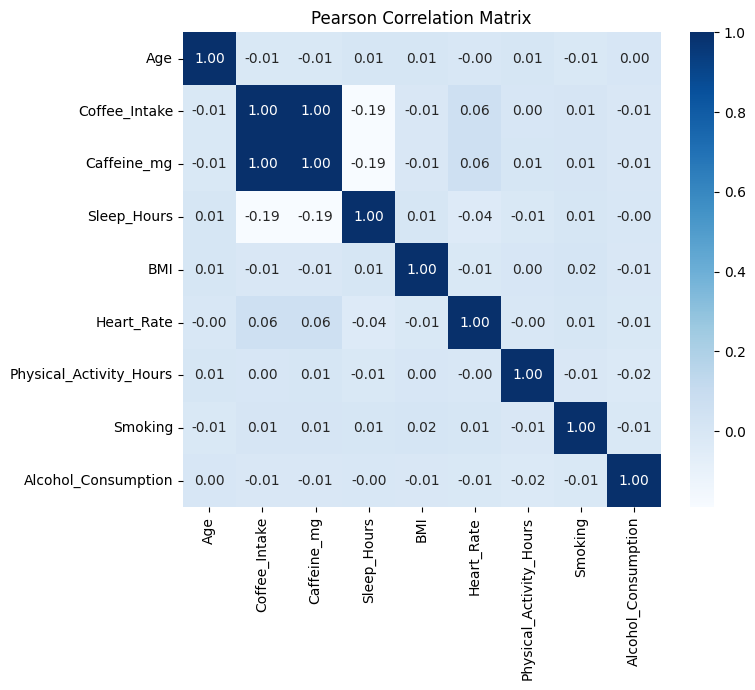

In [11]:
# Pearson correlation
plt.figure(figsize=(8, 7))
sns.heatmap(
    df.corr(method="pearson", numeric_only=True),
    cmap='Blues',
    annot=True,
    fmt=".2f"
)

plt.title("Pearson Correlation Matrix")
plt.tight_layout()
plt.show()

## About Health
觀察跟健康變數，可以看到多數沒有健康問題的人擁有較多的睡眠時數、年齡在50歲以下、BMI小於30，而健康似乎跟咖啡攝取、生活型態 (運動、抽菸、喝酒)。  
與類別變數做比較，仍然僅與睡眠品質有相關。

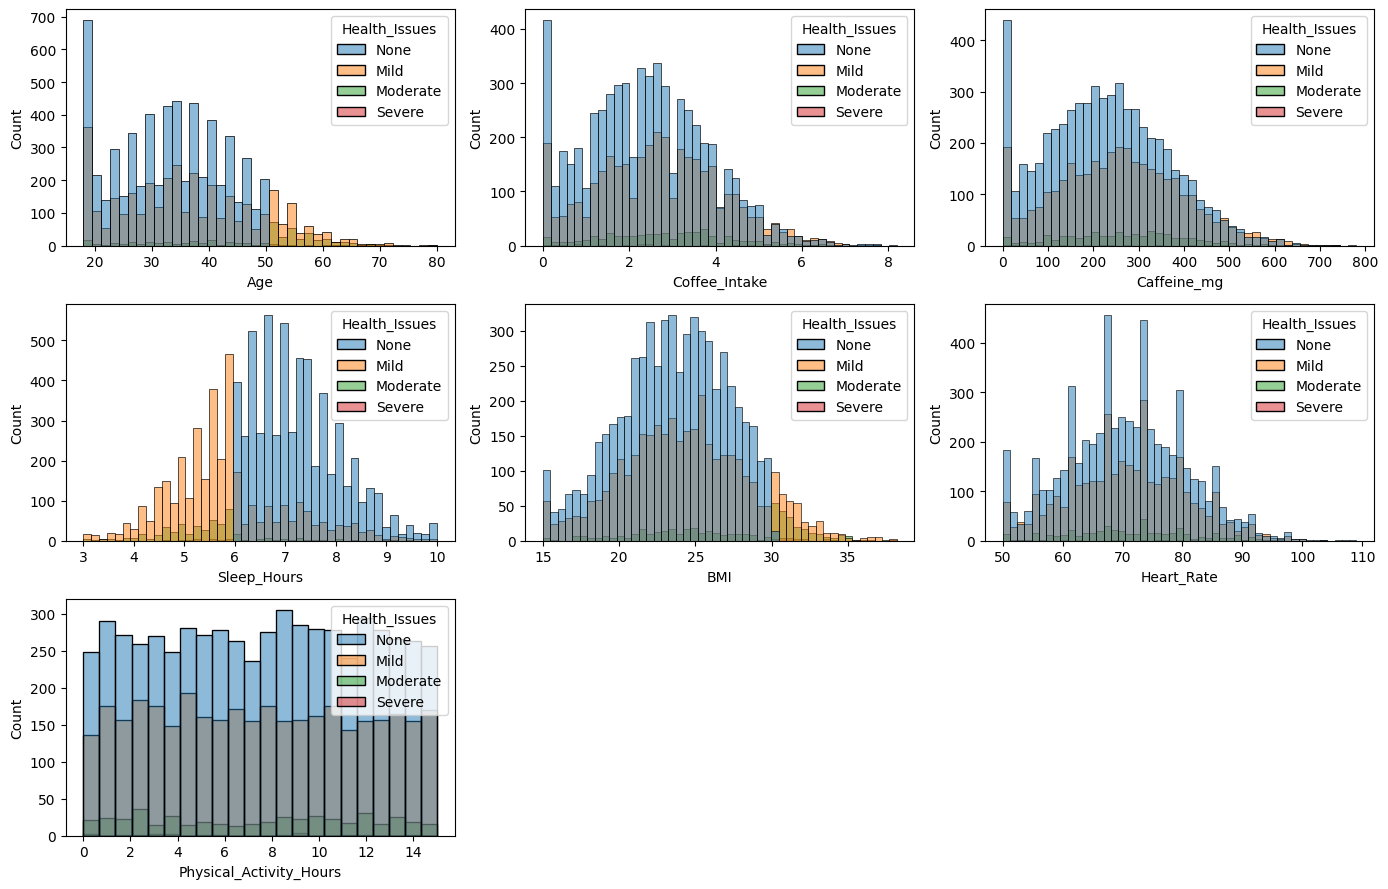

In [12]:
target = "Health_Issues"
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (14, 9))

for i, col in enumerate(quantitative):
    sns.histplot(
        data=df, x=col, hue=target,
        ax=axes[i//3][i%3], palette="tab10")

axes[2][1].axis("off")
axes[2][2].axis("off")
fig.tight_layout()

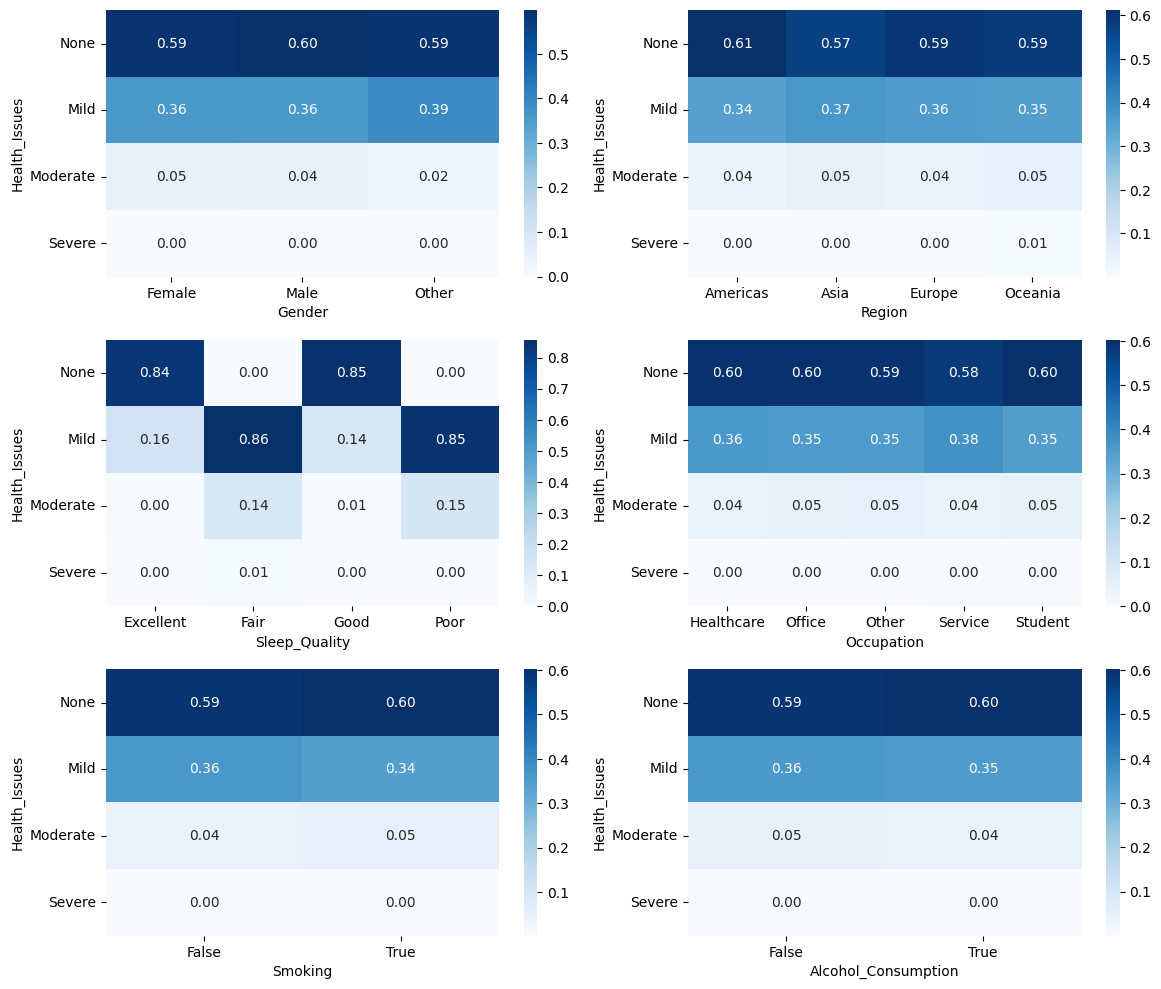

In [13]:
categorical = ['Gender', 'Region', 'Sleep_Quality', 'Occupation', 'Smoking', 'Alcohol_Consumption',]

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))

for i, col in enumerate(categorical):
  ct = pd.crosstab(df[col], df["Health_Issues"], normalize="index")
  ct = ct[['None', 'Mild', 'Moderate', 'Severe']].T
  sns.heatmap(ct, annot=True, cmap="Blues", fmt=".2f", ax=axes[i//2][i%2])

fig.tight_layout()

## About Stress
不管是與定量變數或是類別變數的比較，壓力指數看起來跟睡眠時間、睡眠品質有高度相關，在分布上與生活型態 (運動、抽菸、喝酒) 似乎無關。


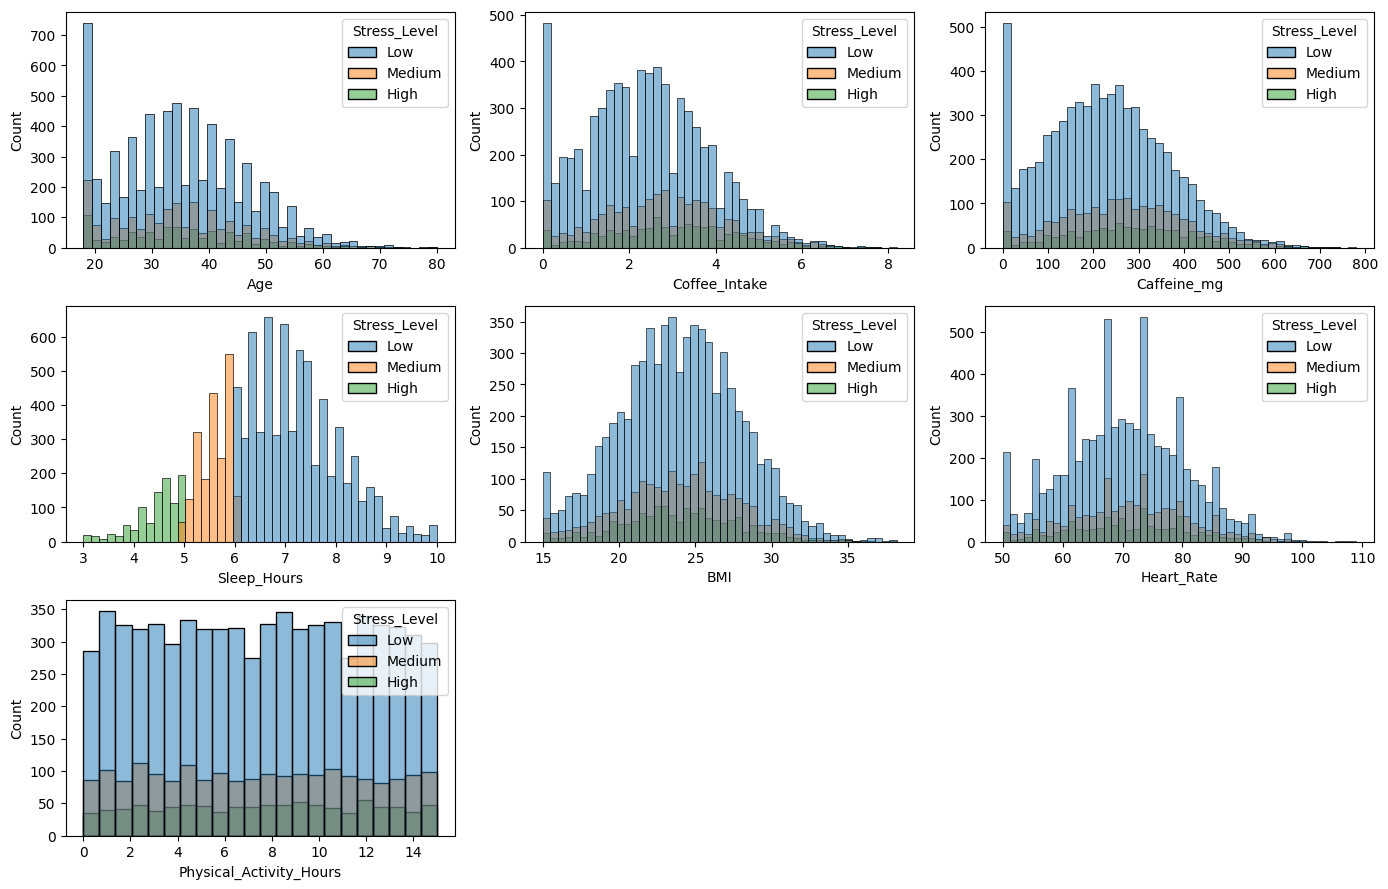

In [14]:
target = "Stress_Level"
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (14, 9))

for i, col in enumerate(quantitative):
    sns.histplot(
        data=df, x=col, hue=target,
        ax=axes[i//3][i%3], palette="tab10")

axes[2][1].axis("off")
axes[2][2].axis("off")

fig.tight_layout()

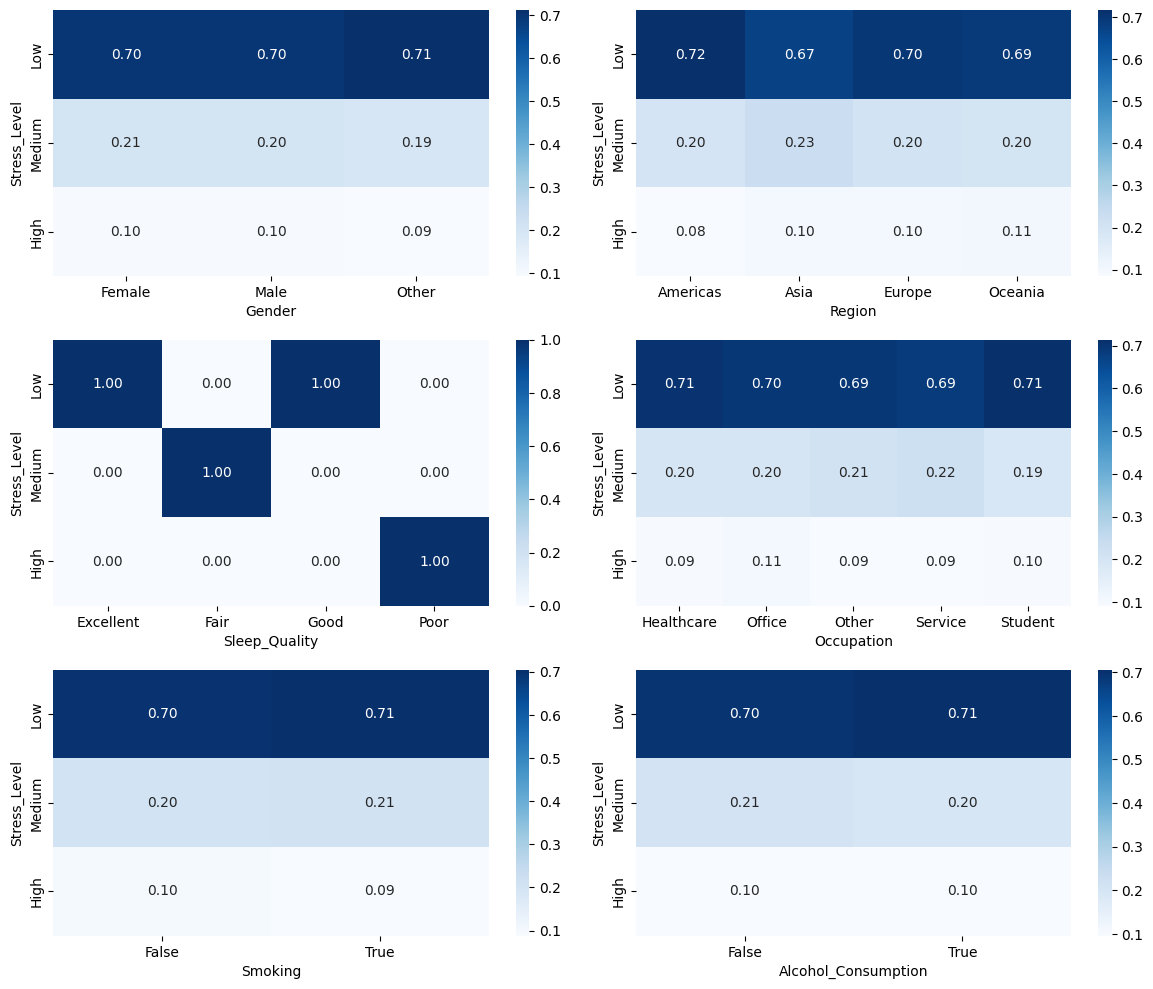

In [15]:
categorical = ['Gender', 'Region', 'Sleep_Quality', 'Occupation', 'Smoking', 'Alcohol_Consumption',]

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))

for i, col in enumerate(categorical):
  ct = pd.crosstab(df[col], df["Stress_Level"], normalize="index")
  ct = ct[['Low', 'Medium', 'High']].T
  sns.heatmap(ct, annot=True, cmap="Blues", fmt=".2f", ax=axes[i//2][i%2])

fig.tight_layout()

# Feature Preprocessing
特徵處理步驟:
1. 移除不必要變數: `Caffeine_mg`, `Sleep_Quality` (來自睡眠時間)、`Country` (用地區代替)
2. 缺失值填補 (`Health_Issues` 已填補已完成)
3. 將類別變數轉換為模型可接受的數值型態
    - label encoding: `Sleep_Quality`, `Stress_Level`, `Health_Issues`
    - one-hot encoding: `Gender`, `Occupation`, `Region`
4. 標準化資料

In [16]:
# Drop columns
df = df.drop(columns=["Caffeine_mg", "Sleep_Quality", "Country"])

# one-hot encoding
df = pd.get_dummies(df, columns=["Gender", "Occupation", "Region"], drop_first=False)

# label encoding
#df["Sleep_Quality"] = df["Sleep_Quality"].map({"Poor":0, "Fair":1, "Good":2, "Excellent":3})
df["Stress_Level"] = df["Stress_Level"].map({"Low":0, "Medium":1, "High":2})
df["Health_Issues"] = df["Health_Issues"].map({"None":0, "Mild":1, "Moderate":2, "Severe":3})

# Standardize on quantitative columns
from sklearn.preprocessing import StandardScaler
quantitative = ['Age', 'Coffee_Intake','Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']
scaler = StandardScaler()
df[quantitative] = scaler.fit_transform(df[quantitative])

In [17]:
# View
df.head()

,Age,Coffee_Intake,Sleep_Hours,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Smoking,Alcohol_Consumption,...,Gender_Other,Occupation_Healthcare,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student,Region_Americas,Region_Asia,Region_Europe,Region_Oceania
0,0.452574,0.683207,0.706861,0.233766,0.751563,0,1.625265,0,False,False,...,False,False,False,True,False,False,False,False,True,False
1,-0.174645,-1.040723,-0.356974,-1.020645,-0.368319,0,0.814134,0,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0.631779,1.924437,-0.602474,-0.329439,-1.182779,1,0.860485,1,False,False,...,False,False,True,False,False,False,True,False,False,False
3,1.617409,0.062592,0.543194,0.182565,0.038911,0,-0.205573,1,False,False,...,False,False,False,True,False,False,False,False,True,False
4,-0.264247,0.407378,-1.093475,0.028964,0.547948,1,0.234755,1,False,True,...,False,False,False,False,False,True,False,False,True,False


# Split data
將資料以 6:4 切分為訓練集與測試集。訓練集有 6000 筆，而測試集有 4000 筆資料。

In [18]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(
    df,
    test_size=0.4,
    random_state=42,
    shuffle=True,
)

# First target - Health_Issues
y_train_h = df_train.pop("Health_Issues")
y_test_h = df_test.pop("Health_Issues")

# Second target - Stress_Level
y_train_s = df_train.pop("Stress_Level")
y_test_s = df_test.pop("Stress_Level")

X_train = df_train.copy()
X_test = df_test.copy()
feature_names = list(X_train.columns)
print(f"Training data shape = {X_train.shape}")
print(f"Test data shape = {X_test.shape}")
print(f"Num of Features: {len(feature_names)}")
print(f"Features: {feature_names}")

Training data shape = (6000, 20)
Test data shape = (4000, 20)
Num of Features: 20
Features: ['Age', 'Coffee_Intake', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption', 'Gender_Female', 'Gender_Male', 'Gender_Other', 'Occupation_Healthcare', 'Occupation_Office', 'Occupation_Other', 'Occupation_Service', 'Occupation_Student', 'Region_Americas', 'Region_Asia', 'Region_Europe', 'Region_Oceania']


# ML - All Feature Model


## Functions

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

def matrix_report(y_true, y_proba, y_pred):
    if len(y_true.unique()) == 2:
        auc = roc_auc_score(y_true, y_proba[:,1])
    else:
        auc = roc_auc_score(y_true, y_proba, multi_class='ovr', average='macro')
    print(f"AUC = {auc:.4f}, Accuracy: {accuracy_score(y_true, y_pred):.4f}\n")
    print(classification_report(y_true, y_pred))

In [20]:
from sklearn.ensemble import RandomForestClassifier

def training_RFmodel(X_train, y_train, X_test, y_test):
  # Training
  rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
  rf_clf.fit(X_train, y_train)

  # Evaluation
  y_train_prob = rf_clf.predict_proba(X_train)
  y_train_pred = rf_clf.predict(X_train)
  print("=== Training Evaluation ===")
  matrix_report(y_train, y_train_prob, y_train_pred)

  y_test_prob = rf_clf.predict_proba(X_test)
  y_test_pred = rf_clf.predict(X_test)
  print("\n\n=== Test Evaluation ===")
  matrix_report(y_test, y_test_prob, y_test_pred)

  return rf_clf

In [21]:
def plot_feature_importances(rf_clf):
  # Extract feature importances
  importances = rf_clf.feature_importances_
  importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
  importance_df.reset_index(drop=True)[:10]

  # Plot bar chart
  plt.figure(figsize=(8, 4))
  sns.barplot(importance_df[:10], y="Feature", x="Importance")
  plt.show()

## Training for Health
對健康程度進行預測，整體表現非常好，測試集準確率有 98.12%，但 Class 3 (Severe) 由於資料量過少而表現相對下降。

In [ ]:
rf_clf_h = training_RFmodel(X_train, y_train_h, X_test, y_test_h)

=== Training Evaluation ===
AUC = 1.0000, Accuracy: 1.0000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3536
           1       1.00      1.00      1.00      2166
           2       1.00      1.00      1.00       288
           3       1.00      1.00      1.00        10

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



=== Test Evaluation ===
AUC = 0.9997, Accuracy: 0.9812

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2405
           1       0.97      0.98      0.98      1413
           2       0.96      0.95      0.96       175
           3       1.00      0.14      0.25         7

    accuracy                           0.98      4000
   macro avg       0.98      0.77      0.79      4000
weighted avg       0.98      0.98      0.98      4000



## Top 10 Important Features for Health Model
- 從模型給出的前 10 個重要特徵可以看到**睡眠時數、年齡與 BMI** 是明顯最重要的變數，與前面探索的分析相同。
- 模型另外還捕捉了幾個變數像是咖啡攝取、運動時數、靜止心率，不過重要指數已經小於 0.1。

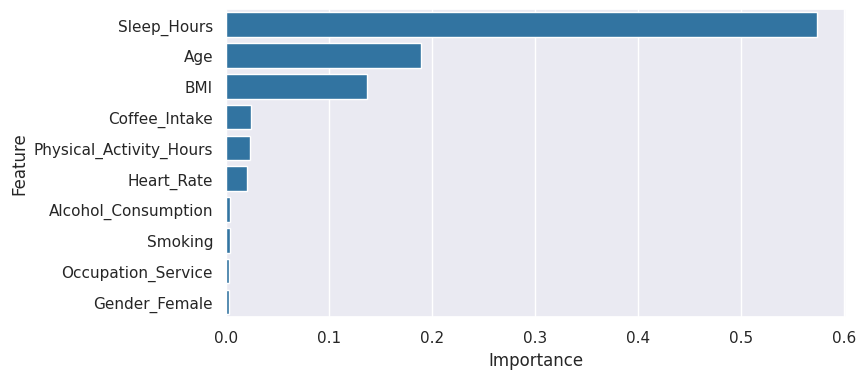

In [ ]:
plot_feature_importances(rf_clf_h)

## Training for Stress
對壓力程度進行預測，整體表現非常好，測試集準確率有 97.9%，克服了三個類別的樣本數不一樣多的狀況。

In [ ]:
rf_clf_s = training_RFmodel(X_train, y_train_s, X_test, y_test_s)

=== Training Evaluation ===
AUC = 1.0000, Accuracy: 1.0000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4149
           1       1.00      1.00      1.00      1271
           2       1.00      1.00      1.00       580

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



=== Test Evaluation ===
AUC = 0.9992, Accuracy: 0.9790

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2840
           1       0.92      0.97      0.95       779
           2       0.98      0.96      0.97       381

    accuracy                           0.98      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.98      0.98      0.98      4000



## Top 10 Important Features for Stress Model
- 從模型給出的前 10 個重要特徵可以看到**睡眠時數**近乎是最主要的特徵，與前面探索的分析相同。

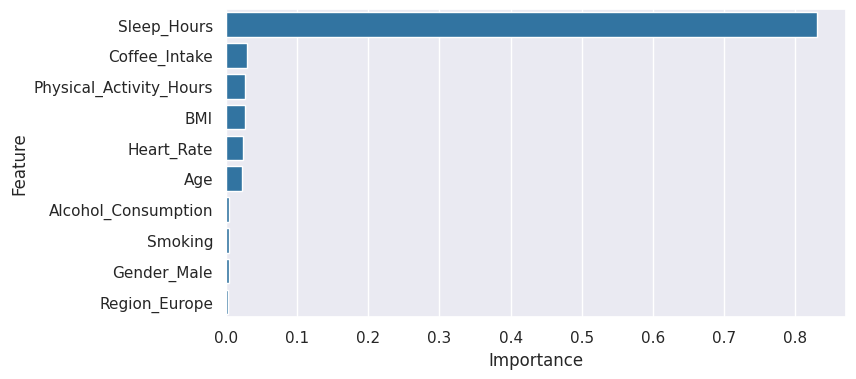

In [ ]:
plot_feature_importances(rf_clf_s)

# ML - Top3 Feature Model (Simplify)
對兩種模型保留 Top3 特徵重新訓練模型，把模型簡化後，測試集的表現皆變得更好。

## Training for Health
使用 Top3 特徵對健康程度進行預測，測試集準確率上升一些至有 98.50%，主要是資料量少的 Class 3 (Severe) ，F1-score 從 25% 進步至 100%。

In [22]:
features = ["Sleep_Hours", "Age", "BMI"]
rf_clf_h2 = training_RFmodel(X_train[features], y_train_h, X_test[features], y_test_h)

=== Training Evaluation ===
AUC = 1.0000, Accuracy: 0.9997

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3536
           1       1.00      1.00      1.00      2166
           2       1.00      1.00      1.00       288
           3       1.00      1.00      1.00        10

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



=== Test Evaluation ===
AUC = 0.9997, Accuracy: 0.9850

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2405
           1       0.97      0.98      0.98      1413
           2       0.99      0.98      0.99       175
           3       1.00      1.00      1.00         7

    accuracy                           0.98      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.98      0.99      4000



## Training for Stress
使用 Top3 特徵對壓力程度進行預測，跟使用全部特徵比起來似乎不算有明顯進步。訓練集的準確率減少不到 0.1%，換來了測試集準確率提升 0.1% 至 98.0%，但 Class 1 (Medium) 和 Class 2 (High) 的 F1-Score 是微幅下降的。

In [27]:
features = ["Sleep_Hours", "Coffee_Intake", "Physical_Activity_Hours"]
rf_clf_s2 = training_RFmodel(X_train[features], y_train_s, X_test[features], y_test_s)

=== Training Evaluation ===
AUC = 1.0000, Accuracy: 0.9993

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4149
           1       1.00      1.00      1.00      1271
           2       1.00      1.00      1.00       580

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



=== Test Evaluation ===
AUC = 0.9992, Accuracy: 0.9800

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2840
           1       0.95      0.95      0.95       779
           2       0.95      0.98      0.96       381

    accuracy                           0.98      4000
   macro avg       0.96      0.97      0.97      4000
weighted avg       0.98      0.98      0.98      4000



# Conclusions
Global Coffee Health Dataset 的訓練結果如下:
- 使用所有 20 個特徵
    - 對於 Health Issue 有 98.12% 的準確率
    - 對於 Stress Level 有 97.90% 的準確率

- 使用 Top3 特徵
    - 對於 Health Issue 有 98.50% 的準確率，且 Class 3 (Severe) 的 F1-score 從 25% 進步至 100%
    - 對於 Stress Level 有 98.00% 的準確率，但 Class 1 (Medium) 和 Class 2 (High) 的 F1-Score 是微幅下降的

簡化模型對 Health Issue 的預測有更明顯的正面效果，幫助僅有 7 個測試數量的 Class 3 (Severe) 的分數進步很多。  
睡眠時數 `Sleep_Hours` 在兩種模型皆擁有著高度重要性，表示睡眠對於健康與壓力影響甚大。  